# Regression Model on Boston-House-Prices DS 
### Mohamed Ahmed Abdelmaksoud 43-16710

Requirements:

- Divide dataset after importing into Train/Cross Validation/Test

- Test various hypothesis with different degrees and optimize your model and parameters using cross validation & test sets as explained in the lecture

- Apply Regularization and optimize the value of its parameter

-----

### Preparing tools for part one.

- <font color='red'>Pandas</font> ==> for dealing with dataset.
- <font color='red'>Numpy</font> ==> for dealing with statistics.
- <font color='red'>Matplotlib, plotly and seaborn</font> ==> for graphs.
- <font color='blue'>from sklearn > train_test_split</font> ==> in order to split the data into Train/Cross Validation/Test.
- <font color='blue'>from sklearn > processing</font> ==> to process the categorize encoding
- <font color='blue'>from sklearn > MinMaxScaler</font> ==> for scaling the data.
- <font color='blue'>from sklearn > Linear Regression </font> ==> for Linear regression.
- <font color='blue'>from sklearn > confusion_matrix </font> ==> confusion_matrix.
- <font color='blue'>from sklearn > accuracy_score </font> ==> accuracy_score.
- <font color='blue'>from sklearn > mean_squared_error </font> ==> finding the mean squared error.
- <font color='blue'>from sklearn > classification_report </font> ==> a report of the classification.
- <font color='blue'>from sklearn > validation curve </font> ==> Drwing a curve to validate our model.
-----------

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
boston = load_boston()

# <center> Loading and exploring data </center>
1- CRIM: Per capita crime rate by town

2- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

3- INDUS: Proportion of non-retail business acres per town

4- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

5- NOX: Nitric oxide concentration (parts per 10 million)

6- RM: Average number of rooms per dwelling

7- AGE: Proportion of owner-occupied units built prior to 1940

8- DIS: Weighted distances to five Boston employment centers

9- RAD: Index of accessibility to radial highways

10- TAX: Full-value property tax rate per $10,000

11- PTRATIO: Pupil-teacher ratio by town

12- B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

13- LSTAT: Percentage of lower status of the population

14- MEDV: Median value of owner-occupied homes in $1000s

In [159]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [160]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [161]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [162]:
data['MEDV'] = boston.target

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [164]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


----
#### 1. Let us plot the distribution of the target data

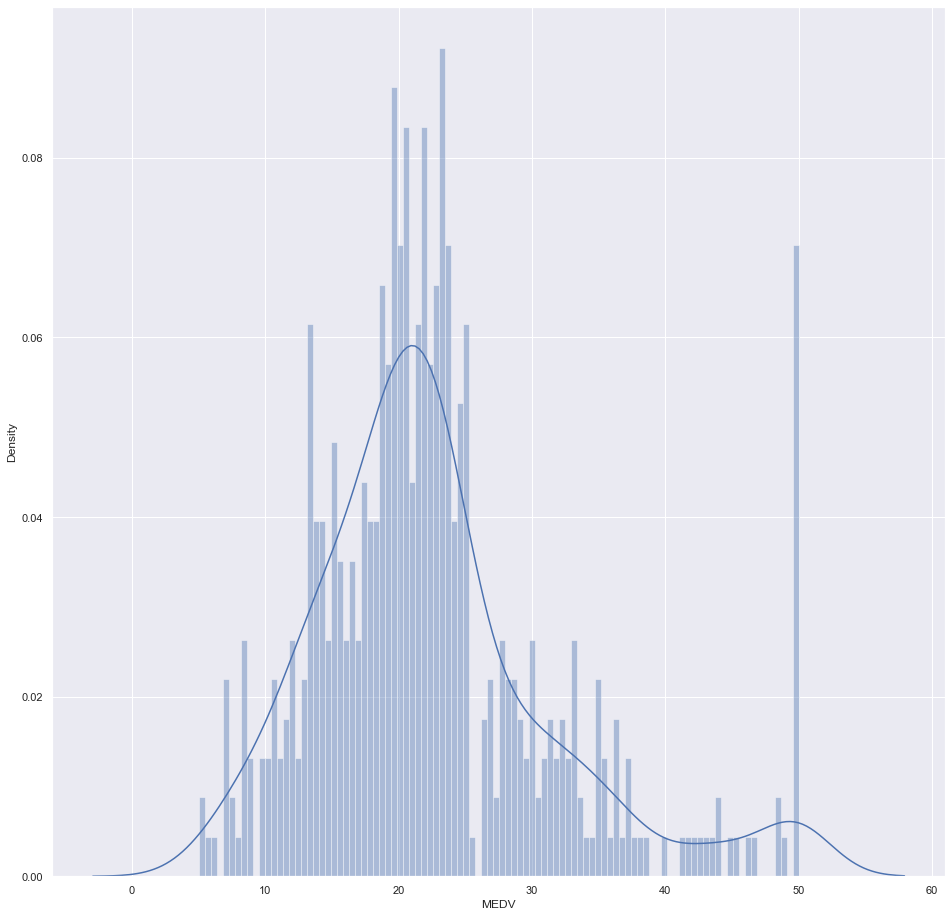

In [165]:
sns.distplot(data['MEDV'], bins=100)
plt.show()
# we can notice it looks like normal distribution

-----------
#### 4. let us check the correlation.
The linear relationships between the variables are measured using a correlation matrix. The corr function from the pandas dataframe package may be used to create the correlation matrix. The correlation matrix will be shown using the heatmap function from the seaborn library.

<AxesSubplot:>

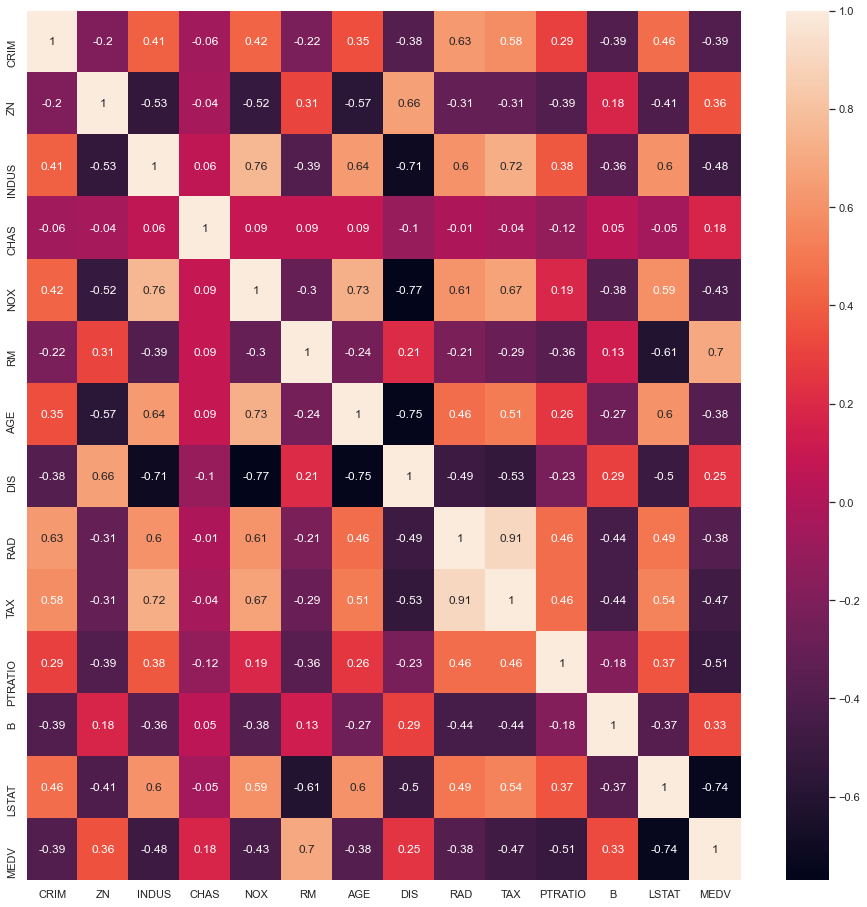

In [166]:
correlation_matrix = data.corr().round(2)
sns.set(rc={'figure.figsize':(16,16)})
sns.heatmap(data=correlation_matrix, annot=True)

The correlation matrix shows that RM has a large positive correlation (0.7) with MEDV, but LSTAT has a substantial negative correlation with MEDV (-0.74).
Checking for multi-co-linearity is an important aspect of feature selection for a linear regression model. A 0.91 connection exists between the characteristics RAD and TAX. These feature pairings have a high level of correlation. For training the model, we should not use both of these characteristics. For more information, look here. DIS and AGE have a -0.75 connection.

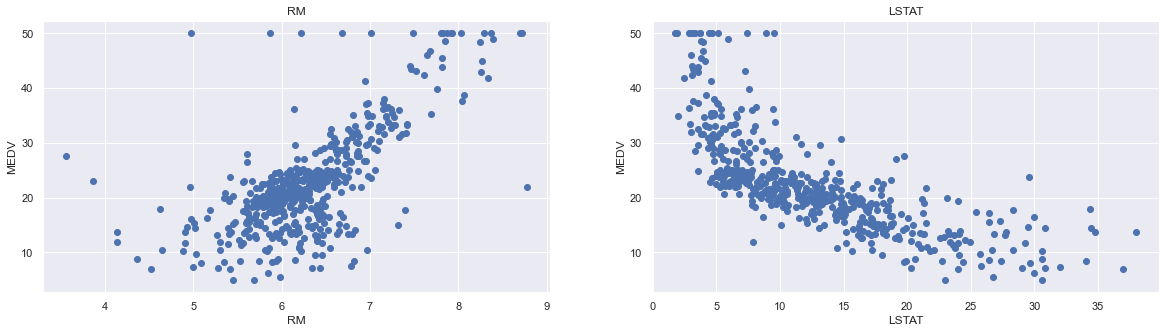

In [167]:
plt.figure(figsize=(20, 5))

features = ['RM', 'LSTAT']
target = data['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

# <center> Divide dataset after importing into Train/Cross Validation/Test </center>

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [169]:
X = data.drop(labels='MEDV', axis=1)
y = data['MEDV']

In [170]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [171]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=100)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, 
    test_size=0.25, random_state=100)

In [173]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [174]:
y_pred = lin_model.predict(X_test)
y_pred.astype('float64')

array([34.48692424, 30.90414629, 22.2841868 , 18.077407  , 20.21583404,
       25.78184232, 26.40999903, 23.78496119, 22.75492973, 19.75201991,
       26.66297152, 17.30321027, 21.19330563, 16.39286649, 41.70004137,
       20.62201202, 28.66630924, 18.62126733, 32.55499615, 41.38924493,
       34.44509492, 18.85287143, 20.47260049, 18.06951756, 14.24481082,
       12.33327386, 27.45864935, 20.93752156, 19.09914134, 20.38115761,
       15.84754943, 24.15564414, 39.57920795, 24.78510336, 31.3307674 ,
       28.36424749, 15.5412318 , 14.93100042, 17.23762654, 23.09618364,
       22.71828073, 23.80438485, 13.73570367, 21.57187258, 31.53155649,
       26.72968829, 19.68122146, 15.25710135, 17.81877217, 12.53232233,
       21.86432158, 20.561507  , 23.48392211, 24.39318648, 12.49829746,
       14.91384288, 25.13150701, 34.11152569, 10.49816096, 21.43596364,
       17.94189743, 20.38202752, 16.86531042, 30.22934749, 20.79713566,
       25.42169857, 16.22833791, 24.88872585, 22.00342021, 20.89

In [175]:
# lets make the cost function
def cost_function_j(y_pred,y):
    m = y.shape[0]
    return (1/(2*m))*np.sum((y_pred-y)**2)

In [176]:
# model evaluation for training set
from sklearn.metrics import r2_score
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for validation set
y_valid_predict = lin_model.predict(X_valid)
rmse = (np.sqrt(mean_squared_error(y_valid, y_valid_predict)))
r2 = r2_score(y_valid, y_valid_predict)

print("The model performance for valid set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.594365452016574
R2 score is 0.7405587534496794


The model performance for testing set
--------------------------------------
RMSE is 4.961140215563122
R2 score is 0.7451929919507321


The model performance for valid set
--------------------------------------
RMSE is 4.907345389080483
R2 score is 0.7001393231883213


### <center> Test various hypothesis with different degrees and optimize your model and parameters using cross validation & test sets as explained in the lecture </center>

I do use polynomialFeatures for this task.

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2]

In [177]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
def poly(deg):
    poly_reg = PolynomialFeatures(degree=deg)
    X_poly = poly_reg.fit_transform(X_train) # here where we introduce the polynomial
    X_valid_pol=poly_reg.transform(X_valid)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y_train)
    y_predict= pol_reg.predict(X_poly)
    rmse_poly = (np.sqrt(mean_squared_error(y_train, y_predict)))
    rmse_poly_valid= (np.sqrt(mean_squared_error(y_valid, pol_reg.predict(X_valid_pol))))
#     print(pol_reg.score(X_valid_pol, y_valid))
    return rmse_poly, rmse_poly_valid, pol_reg.score(X_valid_pol, y_valid)

score

The coefficient :math:`R^2` is defined as :math:`(1 - \frac{u}{v})`,
where :math:`u` is the residual sum of squares ``((y_true - y_pred)
** 2).sum()`` and :math:`v` is the total sum of squares ``((y_true -
y_true.mean()) ** 2).sum()``. The best possible score is 1.0 and it
can be negative (because the model can be arbitrarily worse). A
constant model that always predicts the expected value of `y`,
disregarding the input features, would get a :math:`R^2` score of
0.0.

##### note: rmse_valid and .score are the same, but on the opposite value

In [178]:
listy_list_train=[]
listy_list_valid=[]
listy_list_valid_score=[]
for deg in range(1,8):
    train, valid, score=poly(deg)
    listy_list_train.append(train)
    listy_list_valid.append(valid)
    listy_list_valid_score.append(score)

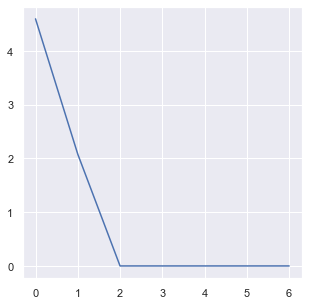

In [179]:
plt.figure(figsize=[5,5])

plt.plot(range(0, len(listy_list_train)), listy_list_train, color ='b')

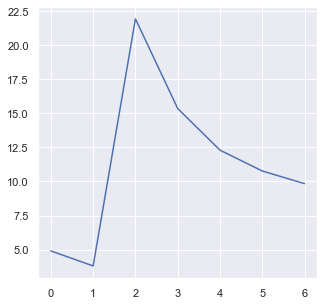

In [180]:
plt.figure(figsize=[5,5])
plt.plot(range(0, len(listy_list_valid)), listy_list_valid, color ='b')

In [181]:
arr=np.array(listy_list_valid_score)
arr.argmax(), listy_list_valid_score[arr.argmax()]

(1, 0.8197138604850052)

#### The best degree is above

In [182]:
arr=np.array(listy_list_train)
arr.argmin(), listy_list_train[arr.argmin()]

(6, 8.970049562385592e-13)

###### Here in train set the degree is 6 as the model prones to overfit

In [183]:
poly_reg = PolynomialFeatures(degree=1)
X_poly = poly_reg.fit_transform(X_train)
X_test_pol=poly_reg.transform(X_test)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)
y_predict= pol_reg.predict(X_poly)
rmse_poly = (np.sqrt(mean_squared_error(y_train, y_predict)))
rmse_poly_test= (np.sqrt(mean_squared_error(y_test, pol_reg.predict(X_test_pol))))

In [184]:
rmse_poly, rmse_poly_test

(4.594365452016574, 4.961140215563123)

In [185]:
pol_reg.score(X_test_pol, y_test)

0.7451929919507319

# <center> Apply Regularization and optimize the value of its parameter </center>

#### Difference between L1 and L2 regularization

The biggest difference between L1 and L2 regularization is that L1 will shrink some coefficients to exactly zero (practically excluding them from the model), making it behave as a variable selection method.
In contrast, because L2 minimizes the sum of the squares of the coefficients, it will affect larger ones much more than it will shrink smaller ones, so coefficients close to zero will barely be shrunk further. Therefore, with L2 regularization, we end up with a model that has a lot of coefficients close to, but not exactly zero.

And because these coefficients can either be positive or negative, minimizing the sum of the raw coefficients will not work. Instead, we can use 1 of the following constraints:

Either to minimize the sum of the absolute value of the regression coefficients — we call this method L1 regularization (a.k.a. LASSO regression)
Or to minimize the sum of the squares of the coefficients — we call this method L2 regularization (a.k.a. Ridge regression)

#### So is L1 better than L2 regularization?
Not necessarily.

LASSO (L1 regularization) is better when we want to select variables from a larger subset, for instance for exploratory analysis or when we want a simple interpretable model. It will also perform better (have a higher prediction accuracy) than ridge regression in situations where a small number of independent variables are good predictors of the outcome and the rest are not that important.

Ridge regression (L2 regularization) performs better than LASSO when we have a large number of variables (or even all of them) each contributing a little bit in predicting the outcome.

In [186]:
#Sklearn is used to implement L1 and L2 regularisation.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean

### 1. Chaning both the degree and the lambda

#### Ridge

In [187]:
err_val_ridge={}
deg=[]
err_train_ridge={}
alpha=[]
lambds=[0,0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24]
ridge = Ridge()
for i in lambds:
    alpha.append(i)
    for deg in range(1,8):
    
        poly = PolynomialFeatures(degree = deg)
        X_poly = poly.fit_transform(X_train)
        x_poly_val=poly.transform(X_valid)
        pol=Ridge(alpha=i)
        pol.fit(X_poly, y_train) 
        y_pred=pol.predict(x_poly_val)
        mean_error=cost_function_j(y_valid,y_pred)
        err_val_ridge[f'lambda= {i} and degree= {deg}']=mean_error
        y_train_pred=pol.predict(X_poly)
        mean_error_train=cost_function_j(y_train,y_train_pred)
        err_train_ridge[f'lambda= {i} and degree= {deg}']=mean_error_train

In [188]:
err_val_ridge

{'lambda= 0 and degree= 1': 12.041019383864732,
 'lambda= 0 and degree= 2': 7.1886138613861394,
 'lambda= 0 and degree= 3': 234.4919293394285,
 'lambda= 0 and degree= 4': 118.0938041742256,
 'lambda= 0 and degree= 5': 74.99838629475411,
 'lambda= 0 and degree= 6': 57.90421786805196,
 'lambda= 0 and degree= 7': 48.384316850571004,
 'lambda= 0.01 and degree= 1': 12.041674184125746,
 'lambda= 0.01 and degree= 2': 6.942051552052784,
 'lambda= 0.01 and degree= 3': 5.876481645006753,
 'lambda= 0.01 and degree= 4': 6.790121715420093,
 'lambda= 0.01 and degree= 5': 8.558808963633517,
 'lambda= 0.01 and degree= 6': 10.300961842484687,
 'lambda= 0.01 and degree= 7': 12.012124310173704,
 'lambda= 0.02 and degree= 1': 12.042431396535349,
 'lambda= 0.02 and degree= 2': 6.74967959041997,
 'lambda= 0.02 and degree= 3': 5.871653867203358,
 'lambda= 0.02 and degree= 4': 6.484305178187742,
 'lambda= 0.02 and degree= 5': 7.729602229454089,
 'lambda= 0.02 and degree= 6': 9.335237654767736,
 'lambda= 0.02 

In [189]:
np.min(list(err_val_ridge.values())); np.argmin(list(err_val_ridge.values()))

16

In [190]:
lis=list(err_val_ridge.keys())
lis[np.argmin(list(err_val_ridge.values()))]

'lambda= 0.02 and degree= 3'

#### This means that 

In [191]:
np.min(err_val_ridge), np.argmin(err_val_ridge)

({'lambda= 0 and degree= 1': 12.041019383864732,
  'lambda= 0 and degree= 2': 7.1886138613861394,
  'lambda= 0 and degree= 3': 234.4919293394285,
  'lambda= 0 and degree= 4': 118.0938041742256,
  'lambda= 0 and degree= 5': 74.99838629475411,
  'lambda= 0 and degree= 6': 57.90421786805196,
  'lambda= 0 and degree= 7': 48.384316850571004,
  'lambda= 0.01 and degree= 1': 12.041674184125746,
  'lambda= 0.01 and degree= 2': 6.942051552052784,
  'lambda= 0.01 and degree= 3': 5.876481645006753,
  'lambda= 0.01 and degree= 4': 6.790121715420093,
  'lambda= 0.01 and degree= 5': 8.558808963633517,
  'lambda= 0.01 and degree= 6': 10.300961842484687,
  'lambda= 0.01 and degree= 7': 12.012124310173704,
  'lambda= 0.02 and degree= 1': 12.042431396535349,
  'lambda= 0.02 and degree= 2': 6.74967959041997,
  'lambda= 0.02 and degree= 3': 5.871653867203358,
  'lambda= 0.02 and degree= 4': 6.484305178187742,
  'lambda= 0.02 and degree= 5': 7.729602229454089,
  'lambda= 0.02 and degree= 6': 9.335237654767

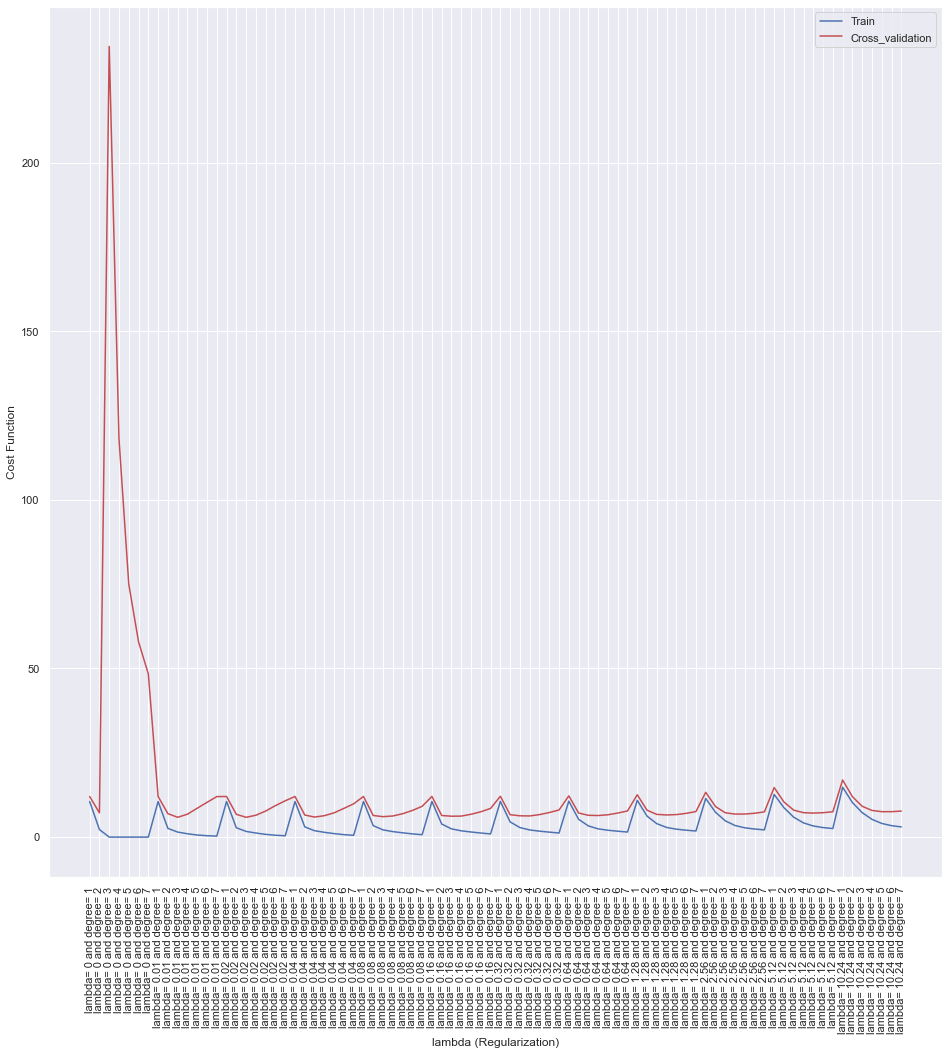

In [192]:
fig, ax = plt.subplots()
ax.plot(err_train_ridge.keys(), err_train_ridge.values(), '-b', label='Train')
plt.xticks(rotation=90)
ax.plot(err_val_ridge.keys(), err_val_ridge.values(), '-r', label='Cross_validation')
plt.xlabel("lambda (Regularization)")
plt.ylabel("Cost Function")
leg = ax.legend();

#### It is obvoius that in every era the model strat with under fitting then good and the last is overfitting

In [201]:
# Building and fitting the Ridge Regression model
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X_train)
x_poly_val=poly.transform(X_valid)
X_test_poly3_ridge = poly.transform(X_test)
ridgeModelChosen = Ridge(alpha = 0.02 )
ridgeModelChosen.fit(X_poly, y_train)
 
# Evaluating the Lasso Regression model
print(ridgeModelChosen.score(x_poly_val, y_valid))

0.8537766573997163


In [194]:
# Building and fitting the Ridge Regression model
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X_train)
x_poly_val=poly.transform(X_valid)
ridgeModelChosen = Ridge(alpha = 0.02 )
ridgeModelChosen.fit(X_train, y_train)
 
# Evaluating the Ridge Regression model
print(ridgeModelChosen.score(X_test, y_test))

0.744877398085604


###  Lasso

In [195]:
err_val={}
deg=[]
err_train={}
alpha=[]
lambds=[0,0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24]
lasso = Lasso()
for i in lambds:
    alpha.append(i)
    for deg in range(1,8):
    
        poly = PolynomialFeatures(degree = deg)
        X_poly = poly.fit_transform(X_train)
        x_poly_val=poly.transform(X_valid)
        pol=Lasso(alpha=i)
        pol.fit(X_poly, y_train) 
        y_pred=pol.predict(x_poly_val)
        mean_error=np.sqrt(mean_squared_error(y_valid,y_pred))
        err_val[f'lambda= {i} and degree= {deg}']=mean_error
        y_train_pred=pol.predict(X_poly)
        mean_error_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
        err_train[f'lambda= {i} and degree= {deg}']=mean_error_train

In [196]:
np.min(list(err_val.values())); np.argmin(list(err_val.values()))

9

In [197]:
lis=list(err_val.keys())
lis[np.argmin(list(err_val.values()))]

'lambda= 0.01 and degree= 3'

#### This means that the model is good with a degree that is not big to be overfitted nor small to be underfitted the best is in between.
#### So no high variance or bias, as a mild value for the degree and not too small lambda to result in overfitting and not big to underfit.

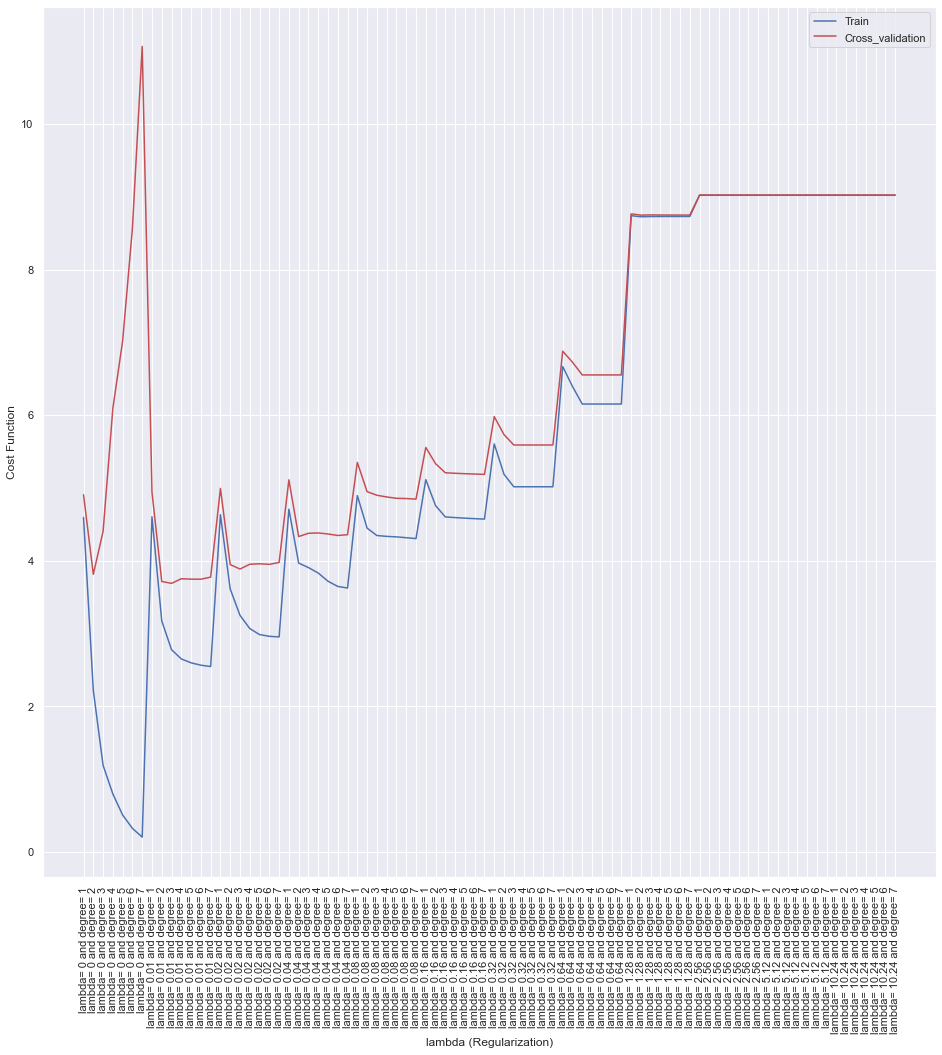

In [198]:
fig, ax = plt.subplots()
ax.plot(err_train.keys(), err_train.values(), '-b', label='Train')
plt.xticks(rotation=90)
ax.plot(err_val.keys(), err_val.values(), '-r', label='Cross_validation')
plt.xlabel("lambda (Regularization)")
plt.ylabel("Cost Function")
leg = ax.legend();

In [199]:
# Building and fitting the Ridge Regression model
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X_train)
x_poly_val = poly.transform(X_valid)
X_test_poly3 = poly.transform(X_test)
lassoModelChosen = Lasso(alpha = 0.01)
lassoModelChosen.fit(X_poly, y_train)
 
# Evaluating the Lasso Regression model
print(lassoModelChosen.score(x_poly_val, y_valid))

0.8304975275888982


In [202]:

# Building the two lists for visualization
models = ['Poly Regression', 'Ridge Regression', 'Lasso Regression']
scores = [pol_reg.score(X_test_pol, y_test),
         ridgeModelChosen.score(X_test_poly3_ridge, y_test),
         lassoModelChosen.score(X_test_poly3, y_test)]
 
# Building the dictionary to compare the scores
mapping = {}
mapping['Poly Regression'] = pol_reg.score(X_test_pol, y_test)
mapping['Ridge Regression'] = ridgeModelChosen.score(X_test_poly3_ridge, y_test)
mapping['Lasso Regression'] = lassoModelChosen.score(X_test_poly3, y_test)
 
# Printing the scores for different models
for key, val in mapping.items():
    print(str(key)+' : '+str(val))

Poly Regression : 0.7451929919507319
Ridge Regression : 0.8763343964620772
Lasso Regression : 0.8896219491918774


Higher accuracy does not always indicates better performance, but in some cases this results in implification in the overall performance.

### 2. without changing the best degree of the polynomial

#### Ridge

In [206]:
err_val=[]
deg=[]
err_train=[]
alpha=[]
lambds=[0,0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24]
ridge = Ridge()
for i in lambds:
    alpha.append(i)
    poly = PolynomialFeatures(degree = 1)
    X_poly = poly.fit_transform(X_train)
    x_poly_val=poly.transform(X_valid)
    pol=Ridge(alpha=i)
    pol.fit(X_poly, y_train) 
    y_pred=pol.predict(x_poly_val)
    mean_error=np.sqrt(mean_squared_error(y_valid,y_pred))
    err_val.append(mean_error)
    y_train_pred=pol.predict(X_poly)
    mean_error_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
    err_train.append(mean_error_train)

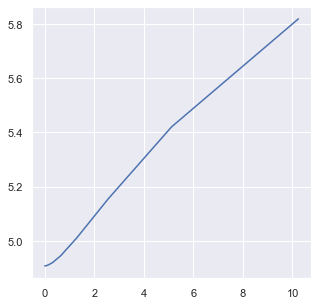

In [207]:
plt.figure(figsize=[5,5])
plt.plot(lambds, err_val)

In [208]:
np.min(err_val), np.argmin(err_val)

(4.907345389080482, 0)

In [209]:
lambds[np.argmin(err_val)]

0

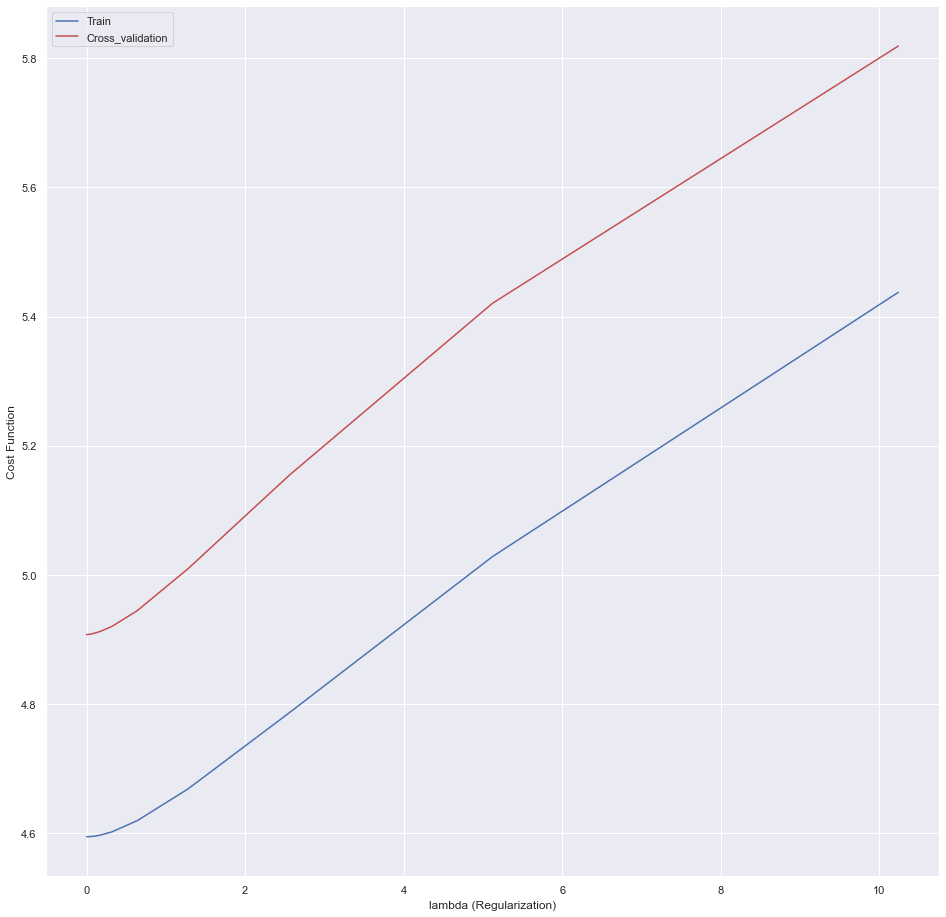

In [210]:

fig, ax = plt.subplots()
ax.plot(lambds, err_train, '-b', label='Train')
ax.plot(lambds, err_val, '-r', label='Cross_validation')
plt.xlabel("lambda (Regularization)")
plt.ylabel("Cost Function")
leg = ax.legend();

In [211]:
# Building and fitting the Lasso Regression Model
ridgeModelChosen = Ridge(alpha = lambds[np.argmin(err_val)])
ridgeModelChosen.fit(X_train, y_train)
 
# Evaluating the Lasso Regression model
print(ridgeModelChosen.score(X_test, y_test))

0.7451929919507321


#### Lasso

In [212]:
err_val_lasso=[]
deg=[]
err_train_lasso=[]
alpha=[]
lambds=[0,0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24]
lasso = Lasso()
for i in lambds:
    alpha.append(i)
    poly = PolynomialFeatures(degree = 1)
    X_poly = poly.fit_transform(X_train)
    x_poly_val=poly.transform(X_valid)
    pol=Lasso(alpha=i)
    pol.fit(X_poly, y_train) 
    y_pred=pol.predict(x_poly_val)
    mean_error=np.sqrt(mean_squared_error(y_valid,y_pred))
    err_val_lasso.append(mean_error)
    y_train_pred=pol.predict(X_poly)
    mean_error_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
    err_train_lasso.append(mean_error_train)

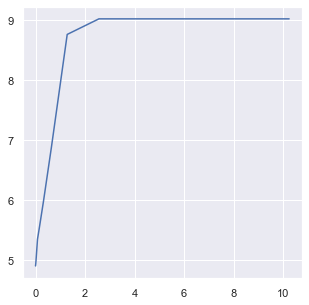

In [213]:
plt.figure(figsize=[5,5])
plt.plot(lambds, err_val_lasso)

In [214]:
np.min(err_val_lasso), np.argmin(err_val_lasso)

(4.907345389080484, 0)

In [215]:
lambds[np.argmin(err_val_lasso)]

0

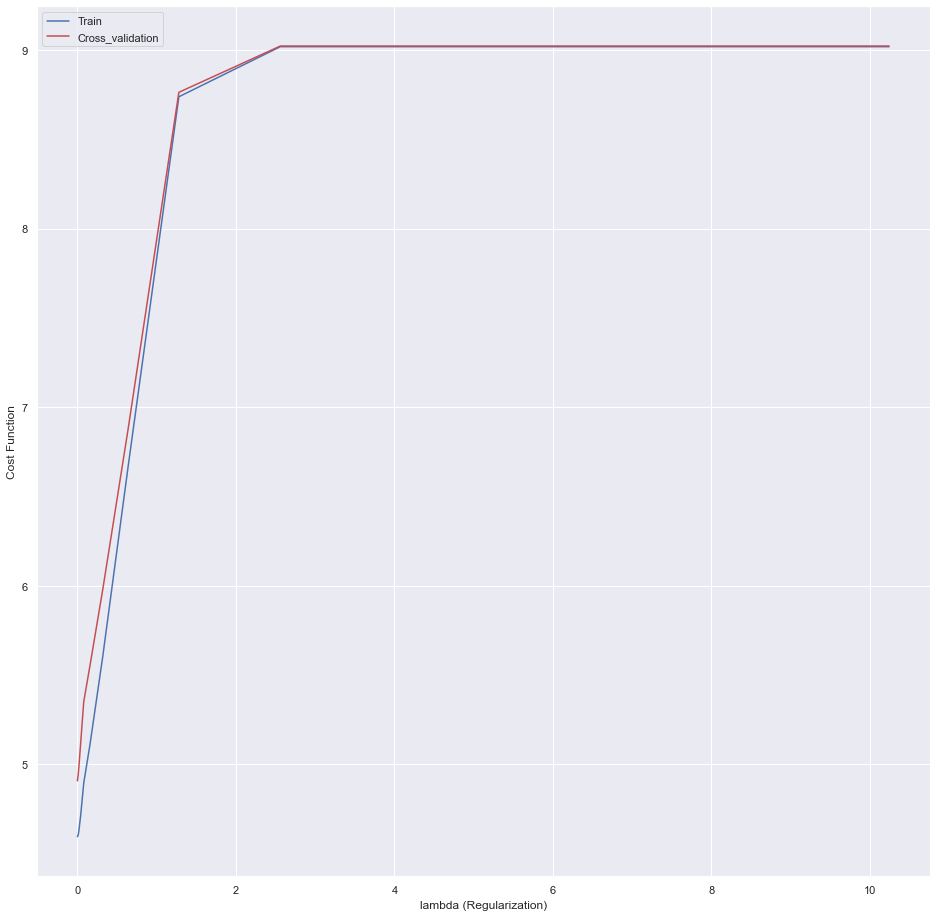

In [216]:
fig, ax = plt.subplots()
ax.plot(lambds, err_train_lasso, '-b', label='Train')
ax.plot(lambds, err_val_lasso, '-r', label='Cross_validation')
plt.xlabel("lambda (Regularization)")
plt.ylabel("Cost Function")
leg = ax.legend();

In [217]:
# Building and fitting the Lasso Regression Model
lassoModelChosen = Lasso(alpha = lambds[np.argmin(err_val_lasso)])
lassoModelChosen.fit(X_train, y_train)
 
# Evaluating the Lasso Regression model
print(lassoModelChosen.score(X_test, y_test))

0.7451929919507316


###### we can see that lambda is zero in this case then we have the original hypothesis with all features

In [218]:

# Building the two lists for visualization
models = ['Poly Regression', 'Ridge Regression', 'Lasso Regression']
scores = [pol_reg.score(X_test_pol, y_test),
         ridgeModelChosen.score(X_test, y_test),
         lassoModelChosen.score(X_test, y_test)]
 
# Building the dictionary to compare the scores
mapping = {}
mapping['Poly Regression'] = pol_reg.score(X_test_pol, y_test)
mapping['Ridge Regression'] = ridgeModelChosen.score(X_test, y_test)
mapping['Lasso Regression'] = lassoModelChosen.score(X_test, y_test)
 
# Printing the scores for different models
for key, val in mapping.items():
    print(str(key)+' : '+str(val))

Poly Regression : 0.7451929919507319
Ridge Regression : 0.7451929919507321
Lasso Regression : 0.7451929919507316


#### 3rd Method Using RidgeCV and LassoCV

In [219]:
import numpy as np
from sklearn import linear_model
# reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
# reg.fit(X_train, y_train)
# print(reg.score(X_test, y_test))
# print(f'lambda = {reg.alpha_}')
err_val_3rd_ridge={}
err_train_3rd_ridge={}
for deg in range(1,8):
    poly = PolynomialFeatures(degree = deg)
    X_poly = poly.fit_transform(X_train)
    x_poly_val=poly.transform(X_valid)
    pol=linear_model.RidgeCV(alphas=[0.01,0.02,0.01,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24])
    pol.fit(X_poly, y_train) 
    y_pred=pol.predict(x_poly_val)
    mean_error=np.sqrt(mean_squared_error(y_valid,y_pred))
    err_val_3rd_ridge[f'lambda= {pol.alpha_} and degree= {deg}']=mean_error
    y_train_pred=pol.predict(X_poly)
    mean_error_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
    err_train_3rd_ridge[f'lambda= {pol.alpha_} and degree= {deg}']=mean_error_train

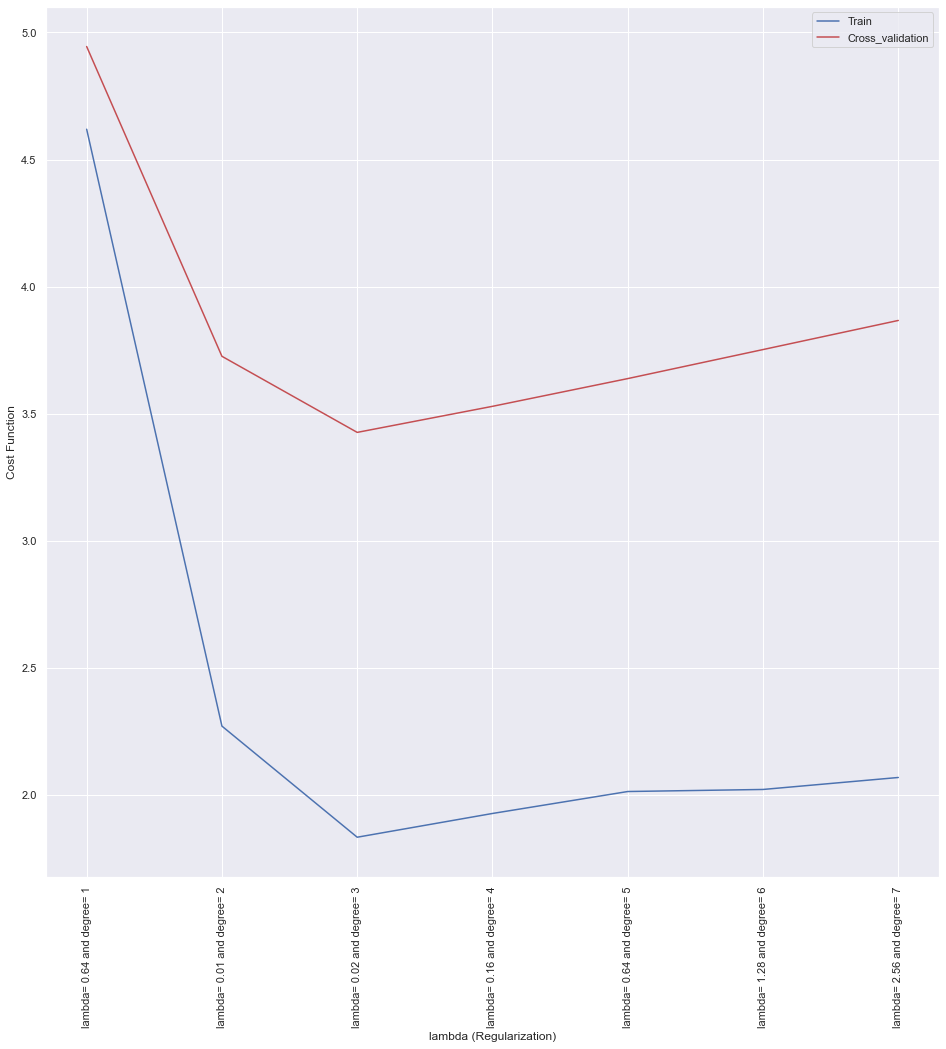

In [220]:
fig, ax = plt.subplots()
ax.plot(err_train_3rd_ridge.keys(), err_train_3rd_ridge.values(), '-b', label='Train')
plt.xticks(rotation=90)
ax.plot(err_val_3rd_ridge.keys(), err_val_3rd_ridge.values(), '-r', label='Cross_validation')
plt.xlabel("lambda (Regularization)")
plt.ylabel("Cost Function")
leg = ax.legend();

In [221]:
list(err_val_3rd_ridge.keys())[np.argmin(list(err_val_3rd_ridge.values()))]

'lambda= 0.02 and degree= 3'

##### we notice that the value matches the one from the very first method

In [222]:
import numpy as np
from sklearn import linear_model
err_val_3rd={}
err_train_3rd={}
for deg in range(1,8):
    poly = PolynomialFeatures(degree = deg)
    X_poly = poly.fit_transform(X_train)
    x_poly_val=poly.transform(X_valid)
    pol=linear_model.LassoCV(alphas=[0.01,0.02,0.01,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24])
    pol.fit(X_poly, y_train) 
    y_pred=pol.predict(x_poly_val)
    mean_error=np.sqrt(mean_squared_error(y_valid,y_pred))
    err_val_3rd[f'lambda= {pol.alpha_} and degree= {deg}']=mean_error
    y_train_pred=pol.predict(X_poly)
    mean_error_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
    err_train_3rd[f'lambda= {pol.alpha_} and degree= {deg}']=mean_error_train

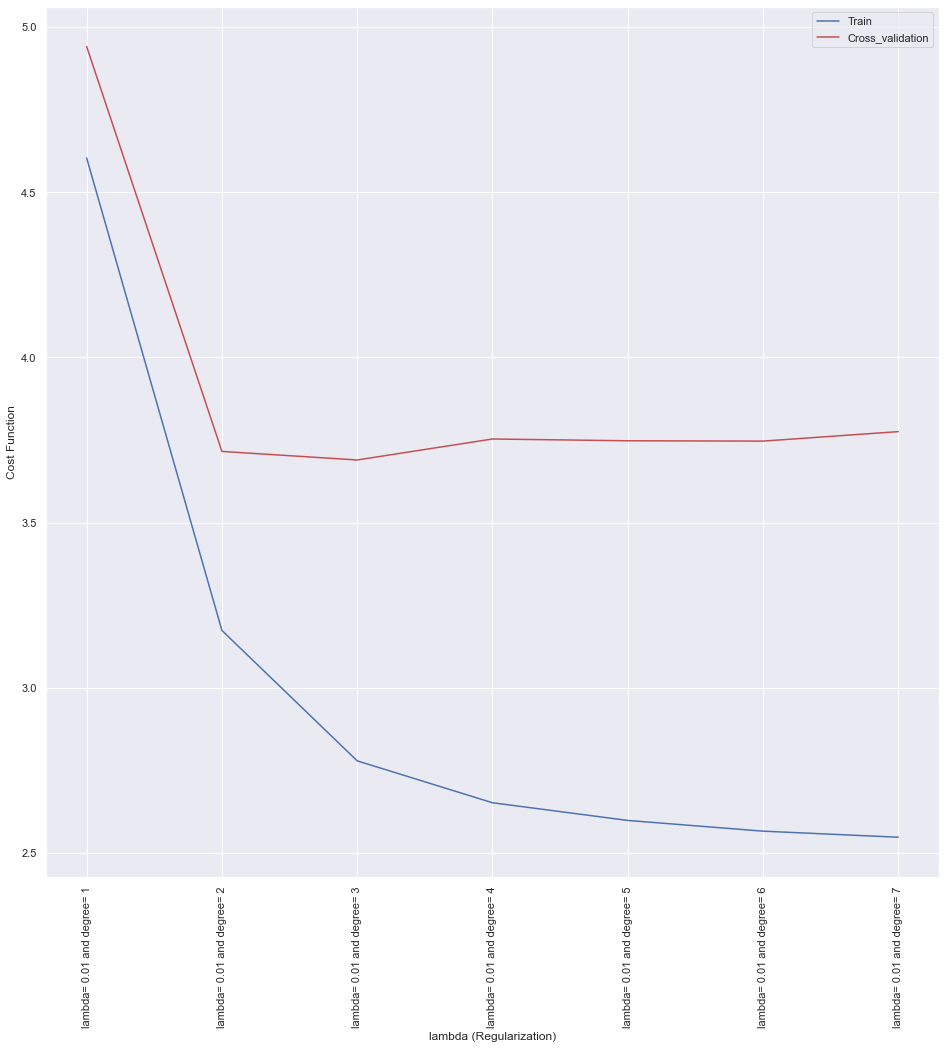

In [223]:
fig, ax = plt.subplots()
ax.plot(err_train_3rd.keys(), err_train_3rd.values(), '-b', label='Train')
plt.xticks(rotation=90)
ax.plot(err_val_3rd.keys(), err_val_3rd.values(), '-r', label='Cross_validation')
plt.xlabel("lambda (Regularization)")
plt.ylabel("Cost Function")
leg = ax.legend();

In [224]:
list(err_val_3rd.keys())[np.argmin(list(err_val_3rd.values()))]

'lambda= 0.01 and degree= 3'

#### we can find a match here also with values from the upper methods

# <center> Trying changing the coefficients </center>

In [225]:
import numpy as np
from sklearn.linear_model import LinearRegression

### coef_array of shape (n_features, ) or (n_targets, n_features)
13 coefficient since 13 features

In [226]:
 np.random.rand(13)

array([0.33616448, 0.84672896, 0.33757012, 0.27838269, 0.84651042,
       0.51163887, 0.68899897, 0.81333748, 0.55506515, 0.43596715,
       0.7920707 , 0.12066392, 0.52093027])

In [ ]:
reg = LinearRegression().fit(X_train, y_train)
train_list=[]
valid_list=[]
test_list=[]
for i in range(0, 100000):
    reg.coef_= np.random.uniform(-10, 10,13)
    # reg.predict(X_train)
    train_list.append(np.sqrt(mean_squared_error(reg.predict(X_train), y_train)))
    valid_list.append(np.sqrt(mean_squared_error(reg.predict(X_valid), y_valid)))
    test_list.append(np.sqrt(mean_squared_error(reg.predict(X_test), y_test)))

In [ ]:
# fig, ax = plt.subplots()
# ax.plot(range(0, 100000), train_list, '-b', label='Train')
# ax.plot(range(0, 100000), valid_list, '-r', label='Cross_validation')
# ax.plot(range(0, 100000), test_list, '-g', label='test')
# plt.xlabel("changing coefficients")
# plt.ylabel("Cost Function")
# leg = ax.legend();

#### we can notice from the above figures that the error in the training set is the least and this is reasnabole since the model is made on the training set, the test errors are fluctuating alot.

In [ ]:
np.min(train_list), np.min(valid_list), np.min(test_list)

In [ ]:
np.argmin(train_list), np.argmin(valid_list), np.argmin(test_list)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression


In [ ]:
reg = LinearRegression().fit(X_train, y_train)
print(np.sqrt(mean_squared_error(reg.predict(X_train), y_train)))
print(np.sqrt(mean_squared_error(reg.predict(X_valid), y_valid)))
print(np.sqrt(mean_squared_error(reg.predict(X_test), y_test)))

From the above results after runing 100000 random coifficients we can conclude that the best tuple of the random solution
is close to the best solution of the automatically defined solution. Although the close of the values yet the predefined coff are better than the random sol.

# <center> From Scratch </center>

In [169]:
import numpy as np
import matplotlib.pyplot as plt
  
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)
  


In [170]:
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
  
    # function to show plot
    plt.show()

Estimated coefficients:
b_0 = 34.55384087938326        
b_1 = -0.9500493537580007


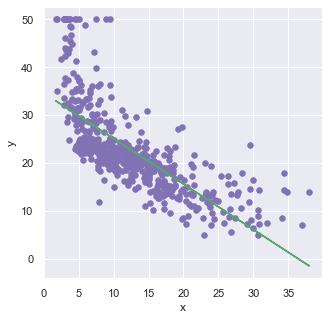

In [171]:
# estimating coefficients
b = estimate_coef(x, y)
print("Estimated coefficients:\nb_0 = {}  \
      \nb_1 = {}".format(b[0], b[1]))

# plotting regression line
plt.figure(figsize=[5,5])
plot_regression_line(x, y, b)